# 24/05/13 - Estudos de redes com até duas camadas e de 4 a 32 neurônios

- Função de perda: RMSE
- Parânmetros do modelo: k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0
- Funções de  ativação: 
    - Elu
    - LeakyReLU
    - Sigmoid
    - Tanh
- Tamanhos de batelada e épocas:
    - (10000, 500)
    - (5000, 1000)

- Arquivo de checkpoint: 1715715532

In [1]:
import glob
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

result_list = glob.glob("edo_pinn_sim/*")

print("numero de arquiteturas testadas: {}".format(len(result_list)))

numero de arquiteturas testadas: 361


In [2]:
result_list[0].split('.')[-1]=="pkl"

True

In [57]:
results_dict = {}

error_list = []

speed_list = []
tmp_list = []

for i, file in enumerate(result_list):

    if file.split('.')[-1]=="pkl":
        with open(file, "rb") as f:
            results_dict[i] = pk.load(f)

        tmp_list.append(results_dict[i]['max_ae'])
        error_list.append(results_dict[i]['rmse'])
        speed_list.append(results_dict[i]['mean_speed_up']-results_dict[i]['std_speed_up'])


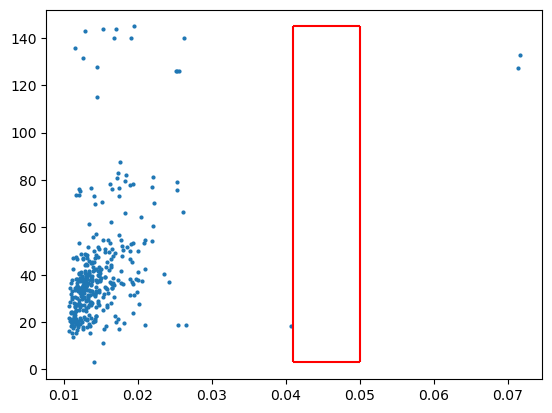

In [58]:
plt.scatter(error_list, speed_list, s=4)
plt.hlines(max(speed_list), 0.041, 0.05, color="r")
plt.hlines(min(speed_list), 0.041, 0.05, color="r")
plt.vlines(0.041, min(speed_list), max(speed_list), color="r")
plt.vlines(0.05, min(speed_list), max(speed_list), color="r")
plt.show()

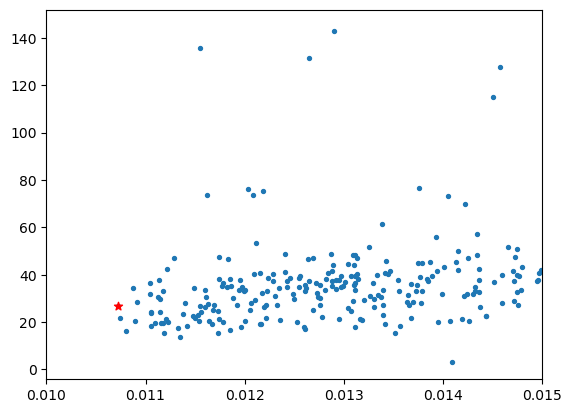

Arquitetura escolhida: epochs_500__batch_10000__arch_Elu--8__Tanh--8__


In [68]:
choice = np.intersect1d(np.argwhere(np.array(speed_list)>25),np.argwhere(np.array(error_list)<0.0108))[0]

plt.scatter(error_list,speed_list,s=8)
plt.scatter(error_list[choice],speed_list[choice],c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01,0.015)
plt.ylim()
plt.show()

arch_str = result_list[choice].split('/')[-1].split(".")[0]

print("Arquitetura escolhida: " + arch_str)

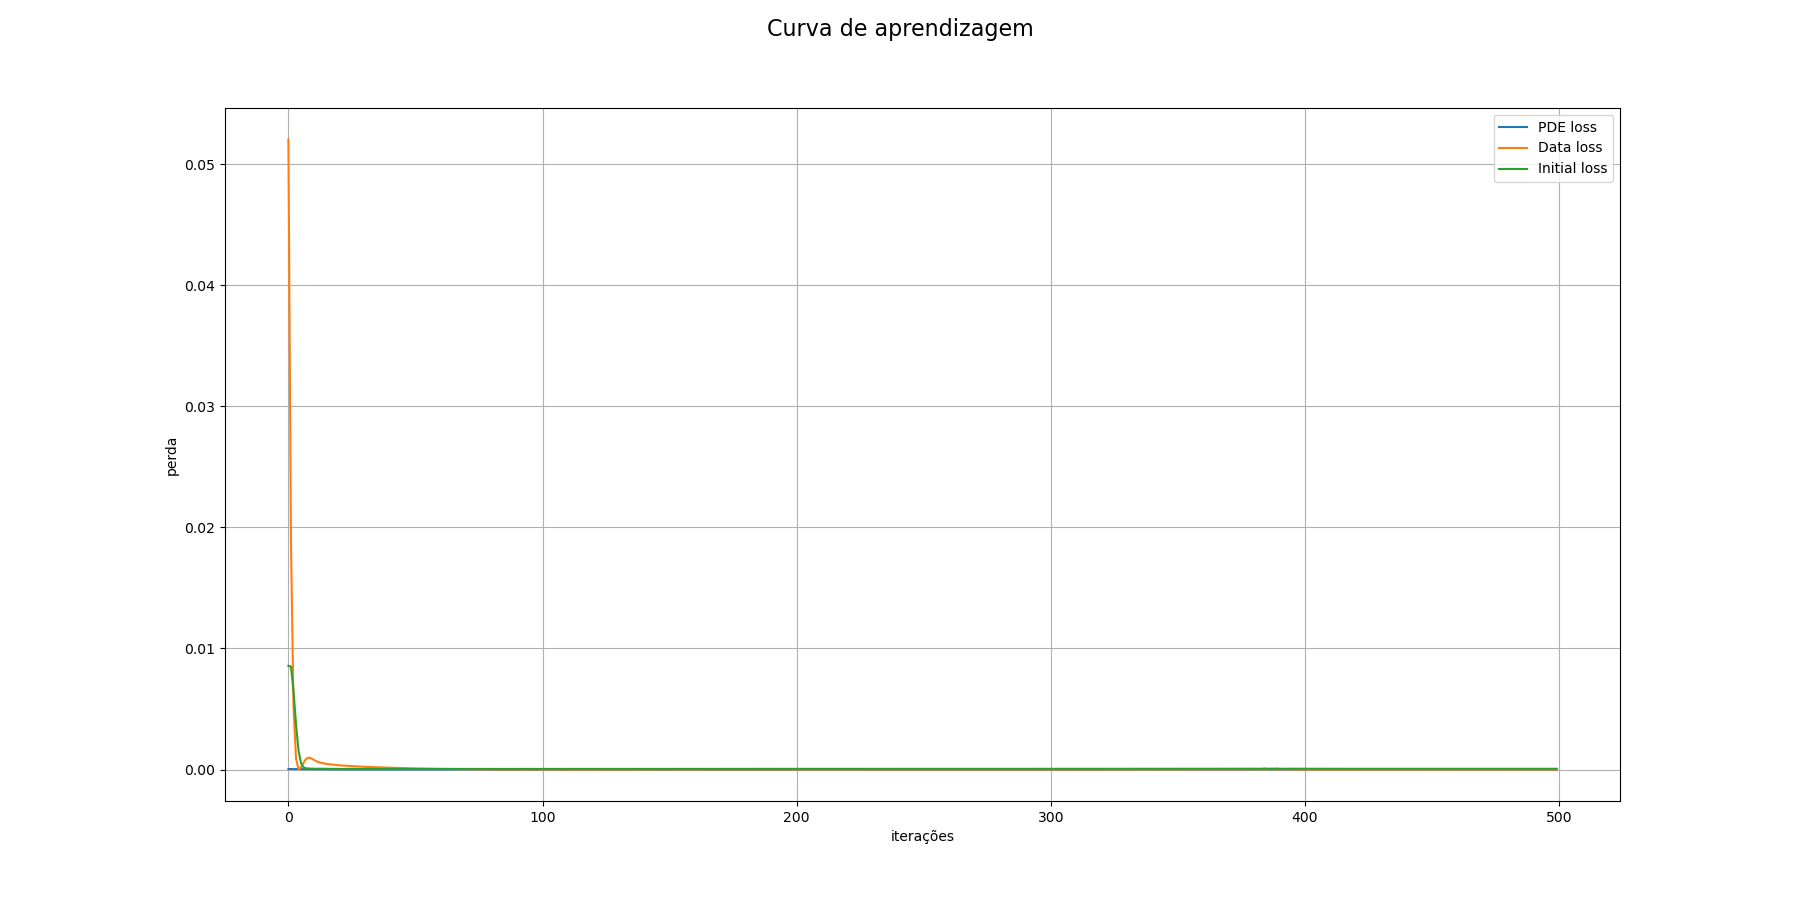

In [70]:
from IPython.display import Image
Image("learning_curves/" + arch_str + ".png")

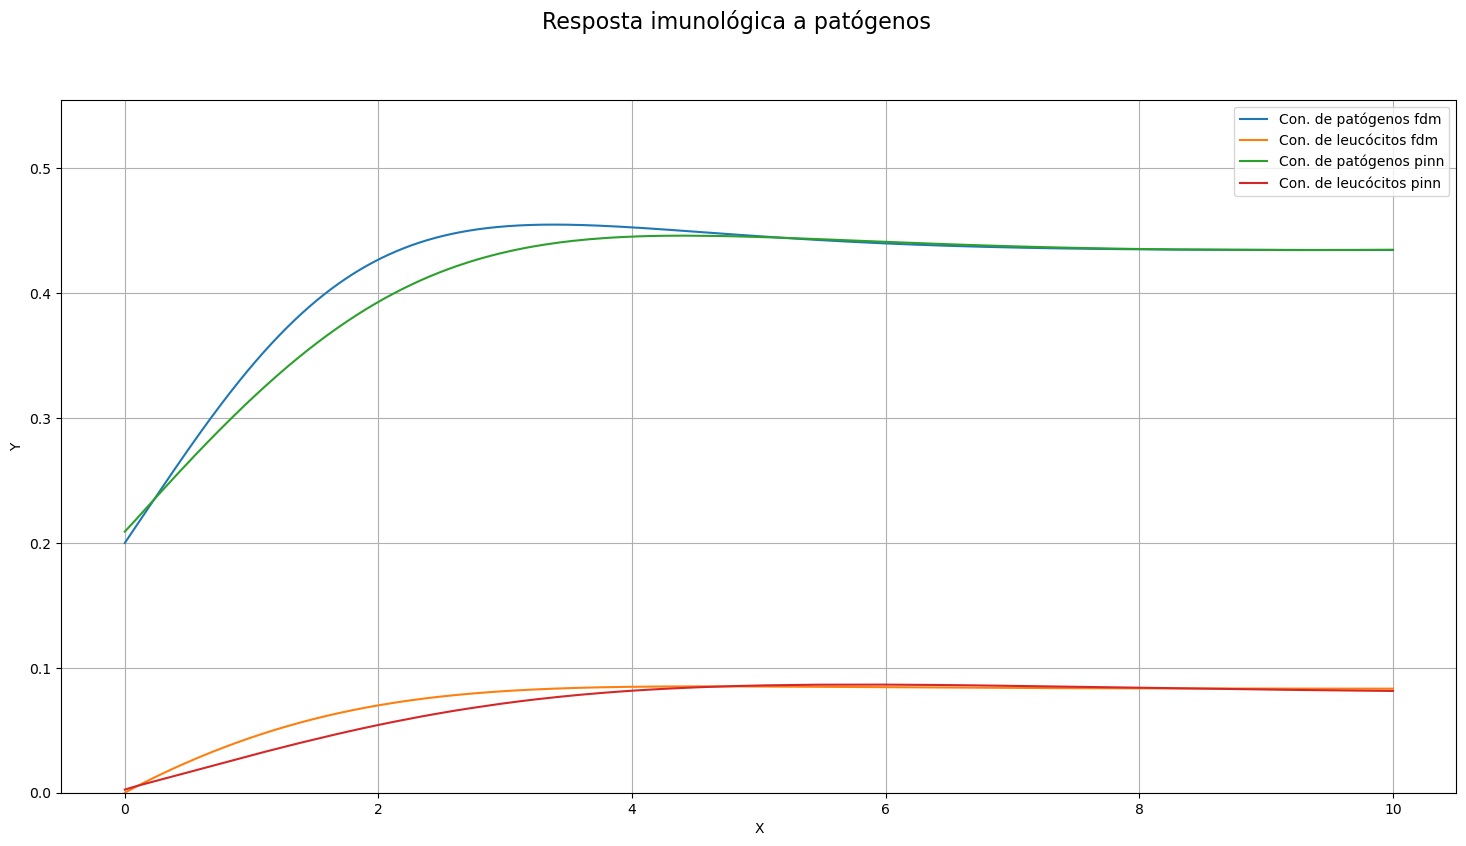

Speed Up: 28.21896935996495 +/-1.442275664514815


In [71]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cp_pinn, label="Con. de patógenos pinn")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl_pinn, label="Con. de leucócitos pinn")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

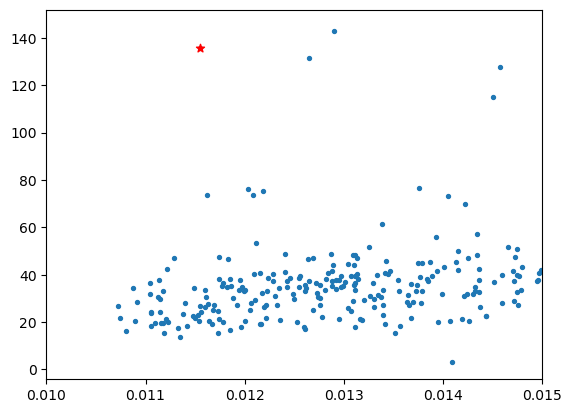

Arquitetura escolhida: epochs_10000__batch_5000__arch_Elu--4__


In [73]:
choice = np.intersect1d(np.argwhere(np.array(speed_list)>120),np.argwhere(np.array(error_list)<0.012))[0]

plt.scatter(error_list,speed_list,s=8)
plt.scatter(error_list[choice],speed_list[choice],c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01,0.015)
plt.ylim()
plt.show()

arch_str = result_list[choice].split('/')[-1].split(".")[0]

print("Arquitetura escolhida: " + arch_str)

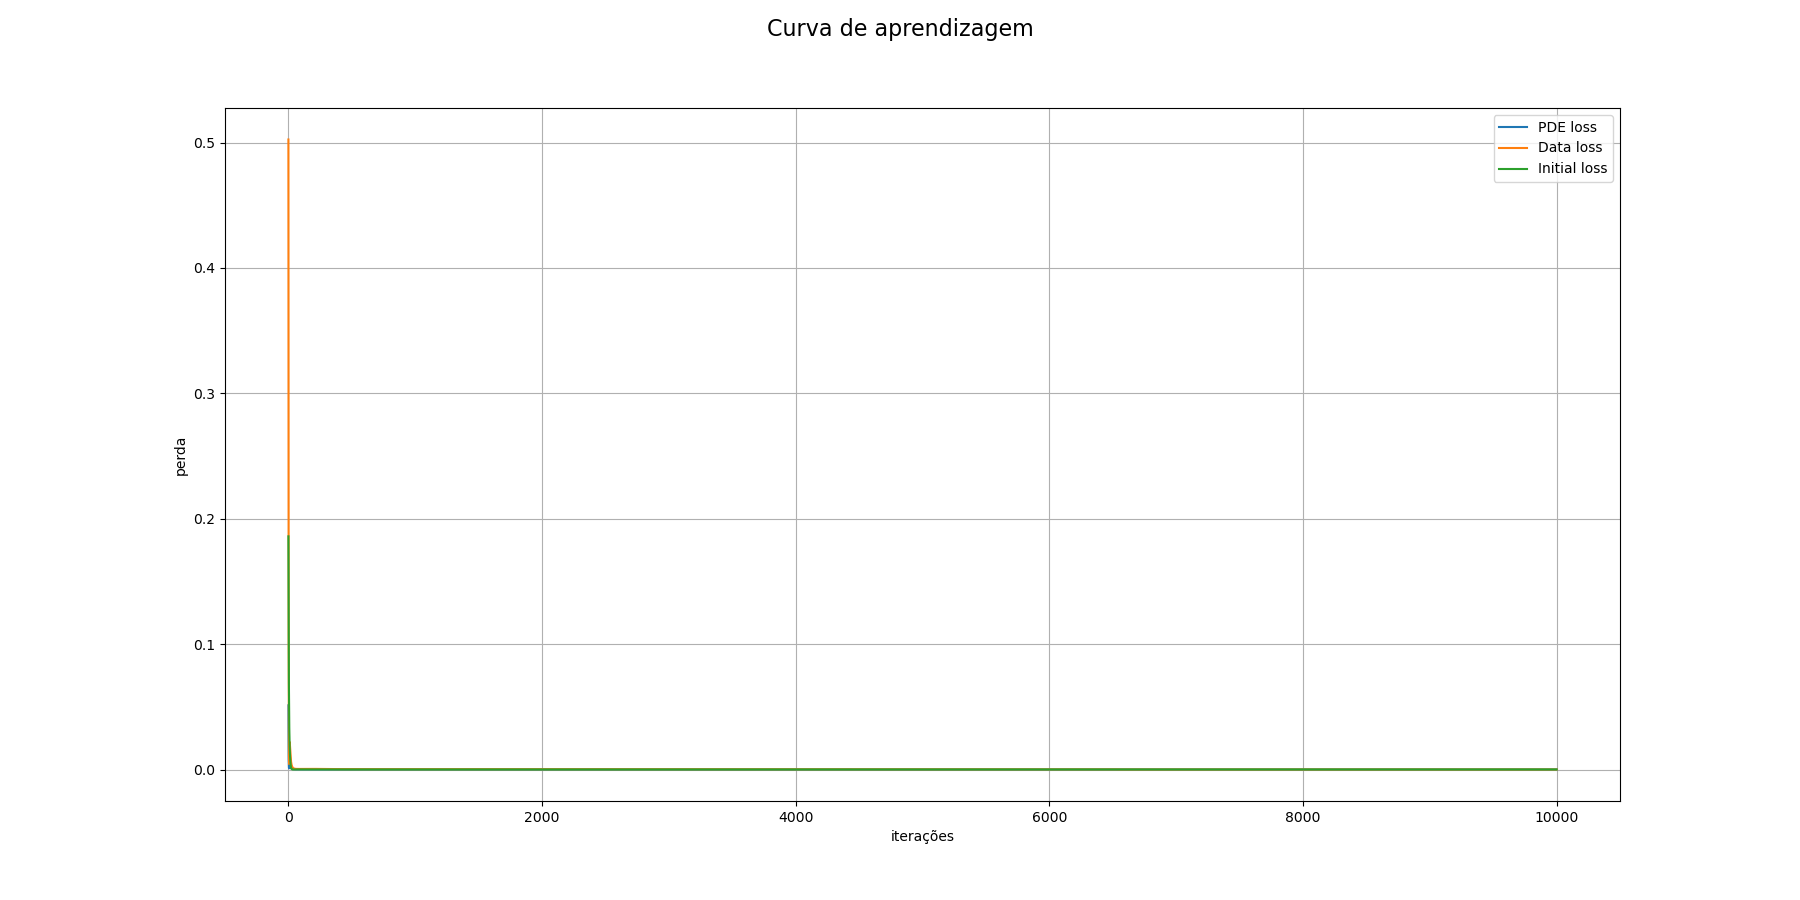

In [74]:
from IPython.display import Image
Image("learning_curves/" + arch_str + ".png")

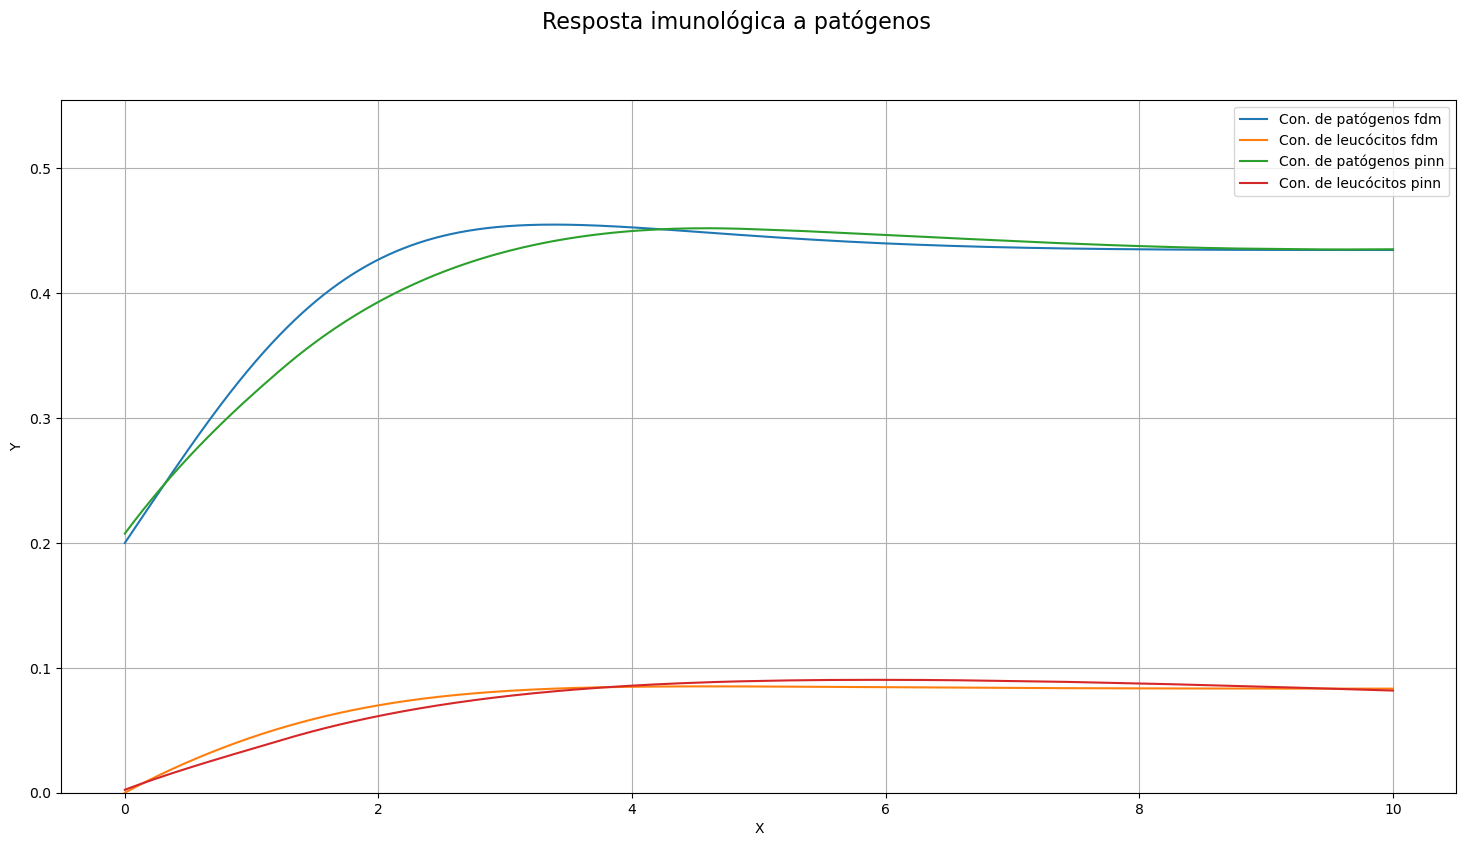

Speed Up: 146.84444529713636 +/-11.243982236235274


In [75]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cp_pinn, label="Con. de patógenos pinn")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl_pinn, label="Con. de leucócitos pinn")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

## Obs
Talvez seja um bom estudo treinar as redes usando perda com a norma L2 e mudar os pesos da perda de condição inicial